# TissueNet Dataset ReadMe

The TissueNet dataset is composed of a train, val, and test split. 
- The train split is composed of aproximately 2600 images, each of which are 512x512 pixels. During training, we select random crops of size 256x256 from each image as a form of data augmentation. 
- The val split is composed of aproximately 300 images, each of which is originally of size 512x512. However, because we do not perform any augmentation on the validation dataset during training, we reshape these 512x512 images into 256x256 images so that no cropping is needed in order to pass them through the model. Finally, we make two copies of the val set at different image resolutions and concatenate them all together, resulting in a total of aproximately 3000 images of size 256x256, 
- The test split is composed of aproximately 300 images, each of which is originally of size 512x512. However, because the model was trained on images that are size 256x256, we reshape these 512x512 images into 256x256 images, resulting in aproximately 1200 images. 

## Change Log
TissueNet 1.0 (July 2021): The original dataset used for all experiments in Greenwald, Miller at al.
TissueNet 1.1 (April 2022): This version of TissueNet has gone through an additional round of manual QC to ensure consistency in labeling across the entire dataset.

# Preprocessing

In [1386]:
import os
import tifffile
import numpy as np
import skimage.io as io

import matplotlib.pyplot as plt

# deepcell only needed to make a pretty plot
#from deepcell.utils.plot_utils import create_rgb_image
#from deepcell.utils.plot_utils import make_outline_overlay

In [1387]:
### Load the test split

# npz_dir = 'tissuenet_v1.1'
# Important!!
# can be changed to tissuenet_v1.1_train.npz, tissuenet_v1.1_test.npz, or tissuenet_v1.1_val.npz accordingly
test_dict = np.load(r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1.0_test.npz")
#test_dict = np.load(r"C:\Users\AndreasWolf\OneDrive - Cellforce Group GmbH\Desktop\WORK\Master Arbeit\Uni Data\tissuenet_data\tissuenet train\tissuenet_v1.0_train.npz")
#test_dict = np.load(r"C:\Users\AndreasWolf\OneDrive - Cellforce Group GmbH\Desktop\WORK\Master Arbeit\Uni Data\tissuenet_data\tissuenet val\tissuenet_v1.0_val.npz")


### Get the image data from the npz

test_X, test_y = test_dict['X'], test_dict['y']

print("shape x: " + str(test_X.shape))
print("shape y: " + str(test_y.shape))

selected_X = test_X
selected_y = test_y

### Randomly choose an image to display

plot_idx = np.random.randint(0, selected_X.shape[0])

shape x: (1249, 256, 256, 2)
shape y: (1249, 256, 256, 2)


In [4]:
# Create overlays of image data and labels

#rgb_images = create_rgb_image(selected_X, channel_colors=['green', 'blue'])
#overlay_data_cell = make_outline_overlay(rgb_data=rgb_images, predictions=selected_y[..., 0:1])
#overlay_data_nuc = make_outline_overlay(rgb_data=rgb_images, predictions=selected_y[..., 1:2])

#io.imshow(overlay_data_cell[plot_idx])
#io.imshow(overlay_data_nuc[plot_idx])

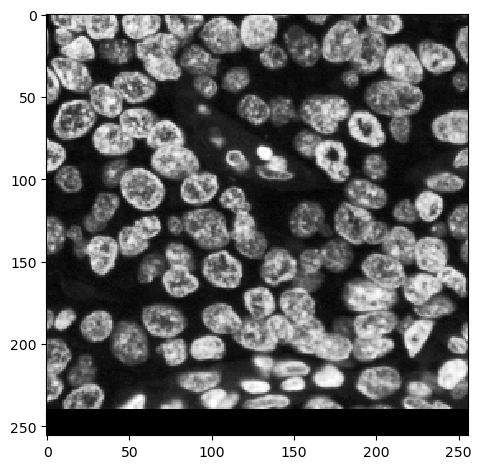

In [1389]:
# show nuclear channel of input image

plot_idx = np.random.randint(0, selected_X.shape[0])
io.imshow(selected_X[plot_idx, :, :, 0])

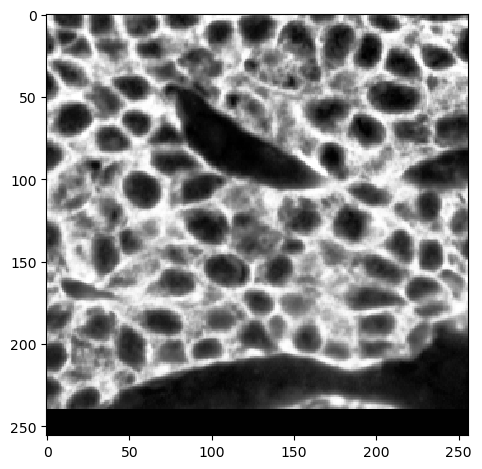

In [1391]:
# show membrane or cytoplasm channel of input image

io.imshow(selected_X[plot_idx, :, :, 1])

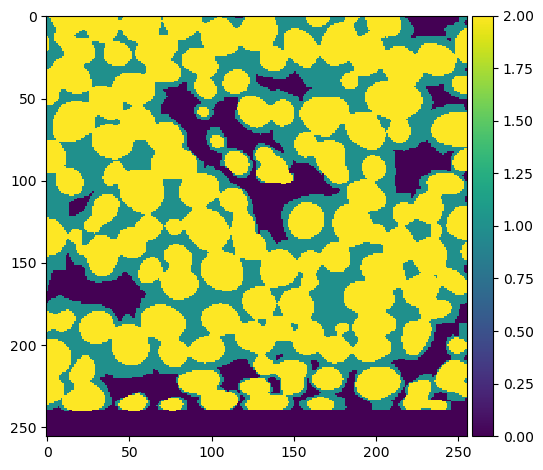

In [1393]:

# quick hack to make the semantic segmentation mask (0: background, 1: cell, 2: nuclear label)
mask_cell = selected_y[plot_idx, :, :, 0] > 0
mask_nuc = (selected_y[plot_idx, :, :, 1] > 0)*2
mask = np.maximum(mask_cell, mask_nuc)

io.imshow(mask)
#plt.imshow(mask)

In [8]:
# save file in OME-TIFF format, with 3 channels, 2 input channels "nuclear" and "mem-cyto", and the segmentation mask

output_path = r'C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\test.ome.tif'

full_image = np.zeros((256, 256, 3))
full_image[:, :, 0] = selected_X[plot_idx, :, :, 0]
full_image[:, :, 1] = selected_X[plot_idx, :, :, 1]
full_image[:, :, 2] = mask
full_image = np.transpose(full_image, (2, 1, 0))

with tifffile.TiffWriter(output_path) as tif:
    tif.write(full_image, photometric='minisblack', metadata={'axes': 'CYX', 'Channel': {'Name': ["nuclear", "mem-cyto", "mask"]}})


# Generate OME-TIFF dataset

In [20]:

#test_dict = np.load(r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1.0_test.npz")

output_path_imgs = r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1_test\Imgs"
output_path_masks = r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1_test\Msks"


num_imgs = selected_X.shape[0]

for i in range(num_imgs):
    
    # quick hack to make the semantic segmentation mask (0: background, 1: cell, 2: nuclear label)
    mask_cell = selected_y[i, :, :, 0] > 0
    mask_nuc = (selected_y[i, :, :, 1] > 0)*2
    mask = np.maximum(mask_cell, mask_nuc)
    
    #old
    """
    full_image = np.zeros((256, 256, 3))
    full_image[:, :, 0] = selected_X[i, :, :, 0]
    full_image[:, :, 1] = selected_X[i, :, :, 1]
    full_image[:, :, 2] = mask
    full_image = np.transpose(full_image, (2, 1, 0))
    
    with tifffile.TiffWriter(output_path + "image_" + str(i) + "_ome.tif") as tif:
        tif.write(full_image, photometric='minisblack', metadata={'axes': 'CYX', 'Channel': {'Name': ["nuclear", "mem-cyto", "mask"]}})
    """
    full_input_image = np.zeros((256, 256, 2))
    full_input_image[:, :, 0] = selected_X[i, :, :, 0]
    full_input_image[:, :, 1] = selected_X[i, :, :, 1]
    full_input_image = np.transpose(full_input_image, (1, 0, 2))
    
    with tifffile.TiffWriter(os.path.join(output_path_imgs, "image_" + str(i) + ".tif")) as tif:
        tif.write(full_input_image, photometric='minisblack', metadata={'axes': 'YXC', 'Channel': {'Name': ["nuclear", "mem-cyto"]}})
    
    
    full_label_image = np.zeros((256, 256, 1))
    full_label_image[:, :, 0] = mask
    full_label_image = np.transpose(full_label_image, (1, 0, 2))

    
    with tifffile.TiffWriter(os.path.join(output_path_masks, "image_" + str(i) + "_mask" + ".tif")) as tif:
        tif.write(full_label_image, photometric='minisblack', metadata={'axes': 'YXC', 'Channel': {'Name': ["mask"]}})
    


In [ ]:
print(output_path + "image_" + str(1) + ".ome.tif")

In [1307]:
#filePath = r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1_test\Imgs\image_input_0.tif"
#filePath = r"C:\Users\Ing_W\Desktop\Master Theses DataSets\TissueNet Main Folder\tissuenet_v1_test\Msks\image_input_0_mask.tif"

filePath = r"C:\Users\Ing_W\Desktop\Master Thesis\ActiveLearningData\Results200promil\pred_0.png"
myimg = io.imread(filePath) 
print(myimg.shape)
# way to show the input image 
io.imshow(myimg) 
io.show()

NameError: name 'io' is not defined

In [1356]:
import torch
nChannels = 4
nClasses = 3
size = 5
#x = torch.randn((3,2,10, 10))
x = torch.randn((3, nChannels, size, size))
x = x[: , : , :, :]
print(x.shape)

torch.Size([3, 4, 5, 5])


In [1385]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

filePath = r"C:\Users\Ing_W\Desktop\Rest of Tissunet\Imgs"
filePath2 = r"C:\Users\Ing_W\Desktop\Rest of Tissunet\Msks"
#filePath = r"C:\Users\Ing_W\Desktop\Master Theses DataSets\ValidationSet\Msks\a_cake_1_mask.jpg"
#filePath = r"C:\Users\Ing_W\Desktop\Master Thesis\ActiveLearningData\Results2promil\predInput_1.png"
#t3est = os.path.splitext(filePath.replace("_mask", ""))[0] 
temp = sorted(os.listdir(filePath), key = lambda element: element.split("_")[2])
print(temp)

temp2 = sorted(os.listdir(filePath2), key = lambda element: element.split("_")[2])
print(temp2)

#image = imread(filePath)
#print(image.shape)
#plt.imshow(image[ :, :, 1])


['image_input_0.tif', 'image_input_1.tif', 'image_input_10.tif', 'image_input_11.tif', 'image_input_12.tif', 'image_input_13.tif', 'image_input_14.tif', 'image_input_15.tif', 'image_input_2.tif', 'image_input_3.tif', 'image_input_4.tif', 'image_input_5.tif', 'image_input_6.tif', 'image_input_7.tif', 'image_input_8.tif', 'image_input_9.tif']
['image_input_0_mask.tif', 'image_input_1_mask.tif', 'image_input_10_mask.tif', 'image_input_11_mask.tif', 'image_input_12_mask.tif', 'image_input_13_mask.tif', 'image_input_14_mask.tif', 'image_input_15_mask.tif', 'image_input_2_mask.tif', 'image_input_3_mask.tif', 'image_input_4_mask.tif', 'image_input_5_mask.tif', 'image_input_6_mask.tif', 'image_input_7_mask.tif', 'image_input_8_mask.tif', 'image_input_9_mask.tif']


In [282]:
## UC like Wickstrom 

import numpy as np
import cv2
threshold = 2

img_rows = 6
img_cols = 6

numClasses = 2

X = np.zeros([1, img_rows, img_cols])
X.shape

T = 100

for i in range(T):
    prediction = np.random.randint(0,high=numClasses, size=[1, img_rows, img_cols])
    X = np.concatenate((X, prediction))

X.shape

X = np.delete(X, [0], 0)

# --> convert prediction into 2d array with values with ints
# DONT NEED THIS!!!
var = np.var(X, axis=0)


std = np.std(X, axis=0)
print(std)

ucValue = np.sum(std)
print(ucValue)

[[0.49749372 0.49749372 0.49839743 0.49507575 0.49959984 0.49839743]
 [0.49839743 0.49989999 0.49638695 0.49909919 0.49638695 0.49749372]
 [0.5        0.49909919 0.49507575 0.49959984 0.49355851 0.49989999]
 [0.49638695 0.49749372 0.49959984 0.49749372 0.49749372 0.49909919]
 [0.49959984 0.5        0.49989999 0.49959984 0.49749372 0.48774994]
 [0.49989999 0.49355851 0.49839743 0.49507575 0.49989999 0.49749372]]
17.917591233620133


In [873]:
## UC like Scandalea with edt 1 - predict

import numpy as np
import cv2
from scipy.ndimage import distance_transform_edt as edt


def range_transform(sample):
    """
    Range normalization for 255 range of values
    :param sample: numpy array for normalize
    :return: normalize numpy array
    """
    if (np.max(sample) == 1):
        sample = sample * 255

    m = 255 / (np.max(sample) - np.min(sample))
    n = 255 - m * np.max(sample)
    return (m * sample + n) / 255


threshold = 2

img_rows = 6
img_cols = 6

numClasses = 2

X = np.zeros([1, img_rows, img_cols])
X.shape

T = 100

for i in range(T):
    prediction = np.random.randint(0,high=numClasses, size=[1, img_rows, img_cols])
    X = np.concatenate((X, prediction))

X.shape

X = np.delete(X, [0], 0)

var = np.var(X, axis=0)
transform = range_transform(edt(1-prediction))
ucValue = np.multiply(var, transform)


print(ucValue)

[[[0.2491     0.16482659 0.         0.17670598 0.16086679 0.        ]
  [0.17564532 0.         0.1767767  0.17564532 0.         0.        ]
  [0.         0.         0.         0.1761403  0.         0.        ]
  [0.17649385 0.1767767  0.         0.1767767  0.         0.        ]
  [0.17649385 0.         0.         0.17649385 0.17670598 0.        ]
  [0.17649385 0.         0.17670598 0.17649385 0.         0.        ]]]


In [874]:
## UC like Scandalea with edt predict

import numpy as np
import cv2
from scipy.ndimage import distance_transform_edt as edt


def range_transform(sample):
    """
    Range normalization for 255 range of values
    :param sample: numpy array for normalize
    :return: normalize numpy array
    """
    if (np.max(sample) == 1):
        sample = sample * 255

    m = 255 / (np.max(sample) - np.min(sample))
    n = 255 - m * np.max(sample)
    return (m * sample + n) / 255


threshold = 2

img_rows = 6
img_cols = 6

numClasses = 2

X = np.zeros([1, img_rows, img_cols])
X.shape

T = 100

for i in range(T):
    prediction = np.random.randint(0,high=numClasses, size=[1, img_rows, img_cols])
    X = np.concatenate((X, prediction))

X.shape

X = np.delete(X, [0], 0)

var = np.var(X, axis=0)
mean = np.mean(X, axis=0)
transform = range_transform(edt(mean))
ucValue = np.multiply(var, transform)

print(ucValue)

[[0.         0.01505347 0.04448593 0.07924886 0.11423452 0.15041225]
 [0.03669469 0.04276167 0.06701302 0.09427082 0.12562451 0.16039714]
 [0.07153923 0.0785821  0.09549512 0.11860678 0.14589773 0.17670279]
 [0.10854228 0.11093268 0.12745994 0.14395948 0.1709502  0.19548913]
 [0.14630888 0.14993074 0.15685565 0.17727028 0.1970759  0.22063645]
 [0.18354687 0.18292796 0.19163005 0.20275535 0.22800568 0.2475    ]]


In [875]:
### UC Valuie Simulation

import numpy as np
import cv2
threshold = 2

img_rows = 1
img_cols = 1

numClasses = 5



X = np.zeros([1, img_rows, img_cols])
X.shape

T = 100000

for i in range(T):
    prediction = np.random.randint(0,high=numClasses, size=[1, img_rows, img_cols])
    X = np.concatenate((X, prediction))

X.shape

X = np.delete(X, [0], 0)

std = np.std(X, axis=0)
print(std)

[[1.41609225]]


In [876]:
import numpy as np 

def estimationT_forActiveLearning(numberClasses = 2):
    """
    Get Maximum Std and Mean Std for n Classes
    """
    arangeArray = np.arange(numberClasses) 
    meanStd = np.std(arangeArray, axis=0)
    stdMax = np.std([0, numberClasses-1])

    """
    Estimation of needed Loop Size to get to Mean Std.
    """
    T = 2
    tempCounter = 0
    tempAntiCounter = 0
    threshold = 100
    threshold2 = 0.05
    while True: 
        X = np.random.randint(0,high=numberClasses, size=[T])
        simulatedStd = np.std(X)
        if np.multiply(meanStd, 1 - threshold2) < simulatedStd and simulatedStd < np.multiply(meanStd, 1 + threshold2):
            
            tempCounter += 1
            if tempCounter >= np.multiply(threshold, 0.95):
                ### If a T value is true 95% of the time, the T is accepted and returned.
                break
        else:
            tempAntiCounter += 1
            if tempAntiCounter >= np.multiply(threshold, 0.05):
                ### When the T value has been rejected a specified number of times, the parameters are set to zero.
                #   A new T value is testet in the next loop "T+=1"
                T += 1
                tempCounter = 0
                tempAntiCounter = 0
    return T

T_list = []
for i in range(1000):
    T_list.append(estimationT_forActiveLearning(2))

print(np.max(T_list))
print(np.mean(T_list))
print(np.min(T_list))


44
31.853
17


In [1254]:
## UC P-STD (project Alex)
import numpy as np
import pandas as pd
import cv2

def uncertaintyEstimation_PTSD_simulation(numClasses=2, img_rows=256, img_cols=256, T = 100):
    predictionStack = np.zeros([1, img_rows, img_cols])
    predictionStack = np.random.randint(0,high=numClasses, size=[T, img_rows, img_cols])

    ### Count each Class for each Pixel Value
    ucPreMatrix = np.zeros([1, img_rows, img_cols])
    for i in range(numClasses):
        count = np.count_nonzero(predictionStack == i, axis=0)
        count = np.expand_dims(count, axis=0)
        #count = np.sum(predictionStack == i, axis=0)
        ucPreMatrix = np.concatenate((ucPreMatrix, count))
    ucPreMatrix = np.delete(ucPreMatrix, [0], 0)

    ### Calculate Sum of all Values for each Pixel
    ucSum = np.sum(ucPreMatrix, axis = 0)

    ### Get Probability of each Class per Pixel Stack
    ucPreMatrix_relativ = np.divide(ucPreMatrix, ucSum)

    ### Get Std of Probabilities of each Class per Pixel Stack
    ucPreMatrix_std = np.std(ucPreMatrix_relativ, axis=0)

    ### Estimation of Max Std for given Number of Classes
    maxStdEstimation = np.zeros([numClasses])
    maxStdEstimation[0] = 1
    maxStdEstimation = np.std(maxStdEstimation)

    ### Normalization each Pixel based on Max Std (= UC Map)
    ucMap = np.divide( np.subtract(maxStdEstimation , ucPreMatrix_std ), maxStdEstimation) 
    ucValue = np.mean(ucMap)
    return ucValue, ucMap


#ucV, _ = uncertaintyEstimation_PTSD_simulation(2, 6, 6 ,20)

def t_evaluation(umClasses=2, img_rows=256, img_cols=256, T = 100, testing_loop_size = 1000): #testitng lop size was 1000
    T_list = []
    for i in range(testing_loop_size):
        ucV, _ = uncertaintyEstimation_PTSD_simulation(umClasses, img_rows, img_cols ,T)
        T_list.append(ucV)

    #print(np.max(T_list))
    print(np.mean(T_list))
    #print(np.min(T_list))
    return [T, np.max(T_list), np.mean(T_list), np.min(T_list)]


list = [100, 95, 90, 85, 80, 75 ,70 , 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 2]
numClasses = 2
imageSize = 1
results = []
for element in list:
    print(element)
    results.append(t_evaluation(umClasses=numClasses, img_rows=imageSize, img_cols=imageSize, T = element, testing_loop_size = 1000))

df = pd.DataFrame(data=results, columns=["T", "Max", "Mean", "Min"])
file_name = "UC_T Size Estimation_" + str(numClasses) + "_image size_" + str(imageSize) + ".csv" 
df.to_csv(file_name)


100
0.92032946
95
0.9179105473684213
90
0.9160761111111112
85
0.9131918823529412
80
0.9109395750000002
75
0.9075577066666664
70
0.9049878000000001
65
0.9007464000000001
60
0.8974566333333339
55
0.8918485818181819
50
0.88767572
45
0.8802649777777776
40
0.8747244000000003
35
0.8640056000000004
30
0.8555538
25
0.8388393599999999
20
0.8240253999999999
15
0.7905636000000001
10
0.7537149999999998
5
0.6252091999999999
2
0.499277


In [1275]:
### Testing One Pixel T Values

def t_evaluation_onePixel(umClasses=2, img_rows=1, img_cols=1, T = 100, testing_loop_size = 1000): #testitng lop size was 1000
    T_list = []
    for i in range(testing_loop_size):
        ucV, _ = uncertaintyEstimation_PTSD_simulation(umClasses, img_rows, img_cols ,T)
        T_list.append(ucV)
    print(np.mean(T_list))
    return [T, np.max(T_list), np.quantile(T_list, .75), np.mean(T_list), np.quantile(T_list, .25), np.min(T_list)]

numClasses = 5
imageSize = 1
results = []
for element in range(100,1, -1):
    print(element)
    results.append(t_evaluation_onePixel(umClasses=numClasses, img_rows=imageSize, img_cols=imageSize, T = element, testing_loop_size = 10000))

df = pd.DataFrame(data=results, columns=["T", "Max", "Q3", "Mean", "Q1", "Min"])
file_name = "UC_T Image Size Test_" + str(numClasses) + "_image size_" + str(imageSize) + ".csv" 
df.to_csv(file_name)



100
0.9056188947008561
99
0.9050415182438455
98
0.9051153186358962
97
0.9051953918348683
96
0.9038997820988423
95
0.9031835828355234
94
0.903756615346016
93
0.903035759250123
92
0.9024407669050339
91
0.9005745244599608
90
0.9016635810899148
89
0.9002185050532551
88
0.8997097150309874
87
0.8987151930167114
86
0.8985107191564279
85
0.898219812649635
84
0.8973225629856887
83
0.8967970189289383
82
0.8964381386379692
81
0.8957194692400408
80
0.894667247544729
79
0.8936115804515757
78
0.893839227078815
77
0.8930432393223993
76
0.8925056902438889
75
0.8911127455258582
74
0.8905968487379833
73
0.8899594938417084
72
0.8889967547365577
71
0.8883053126719295
70
0.886681287409495
69
0.8870872382004458
68
0.8863403809395995
67
0.8858535892222111
66
0.8841448877707014
65
0.8830841936957889
64
0.8826320128021767
63
0.8814769987471909
62
0.8805901340923729
61
0.8794107348121575
60
0.877928954548567
59
0.8775305803684592
58
0.8763216606209797
57
0.8746998553453248
56
0.8737779240851808
55
0.87408045943

In [1270]:
### Testing Image Size

def t_evaluation_onePixel(umClasses=2, img_rows=1, img_cols=1, T = 100, testing_loop_size = 1000): #testitng lop size was 1000
    T_list = []
    for i in range(testing_loop_size):
        ucV, _ = uncertaintyEstimation_PTSD_simulation(umClasses, img_rows, img_cols ,T)
        T_list.append(ucV)
    print(np.mean(T_list))
    return [T, np.max(T_list), np.quantile(T_list, .75), np.mean(T_list), np.quantile(T_list, .25), np.min(T_list)]

numClassesList = [2]
imageSizeList = [8, 16, 32]
for numClasses in numClassesList:
    for imageSize in imageSizeList:
        results = []
        for element in range(100,1, -5):
            print(element)
            results.append(t_evaluation_onePixel(umClasses=numClasses, img_rows=imageSize, img_cols=imageSize, T = element, testing_loop_size = 1000))
        df = pd.DataFrame(data=results, columns=["T", "Max", "Q3", "Mean", "Q1", "Min"])
        file_name = "UC_T Image Size Test_" + str(numClasses) + "_image size_" + str(imageSize) + ".csv" 
        df.to_csv(file_name)

100
0.9208121875
95
0.9181970394736841
90
0.9162361111111111
85
0.9131187500000001
80
0.9116566406250001
75
0.9075712499999999
70
0.9048290178571429
65
0.9005490384615384
60
0.8973473958333333
55
0.8918647727272728
50
0.8877206249999999
45
0.8800548611111112
40
0.8749210937499999
35
0.8636241071428572
30
0.8557718750000002
25
0.8393387499999999
20
0.8240609374999999
15
0.7912895833333334
10
0.75485625
5
0.62468125
100
0.920209609375
95
0.9177040296052632
90
0.9160504340277779
85
0.9130499080882354
80
0.9112764648437499
75
0.9075929166666667
70
0.9050847098214286
65
0.9009036057692309
60
0.8974227864583334
55
0.8920869318181819
50
0.8876556249999998
45
0.8802928819444447
40
0.8745044921874999
35
0.8639361607142858
30
0.8559466145833334
25
0.8387003125
20
0.8236046875
15
0.7907046875000001
10
0.7534875
5
0.6246578125000001
100
0.9204670703125
95
0.9178087376644737
90
0.9161501519097224
85
0.9131454733455884
80
0.9110693359375
75
0.9075805989583333
70
0.9049370535714287
65
0.9007652043269

In [38]:
from argparse import ArgumentParser
import os
import folderManagement

parser = ArgumentParser(description='U-Net segmentation for LiTS dataset')
parser.add_argument(        '--general-seed',        type=int,        default=0,        help='General random seed',    )
parser.add_argument(        '--pytorch-seed',        type=int,        default=0,        help='Random seed of all Pytorch functions',    )
parser.add_argument(        '--log-interval',        type=int,        default=100,        help='log interval of stdout'    )

parser.add_argument('--num_workers', type=int,          default=2, metavar='N', help='number of workers (default: 2)')
parser.add_argument('--lr', type=float,                 default=0.0001, help='learning rate (default: 0.0001)')
parser.add_argument('--test-batch-size', type=int,      default=8, help='Input batch size for testing')
parser.add_argument('--test_percent', type=float,       default=0.15, help='dataset percent for testing')
parser.add_argument('--test_epochs', type=int,          default=10, help='epochs before testing')
parser.add_argument('--dataset_path', type=str,         default='data', help='path to dataset')
parser.add_argument('--dataset_size', type=int,         default=131, help='dataset size')
parser.add_argument('--n_channels', type=int,           default=1, help='number of input channels')
parser.add_argument('--n_class', type=int,              default=3, help='number of classes')
parser.add_argument('--dropout_rate', type=float,       default=0.25, help='dropout rate')

### Parser Debug
#  This one only for debug in Notebooks
#  Without it: leads to some  strange errors   -> SystemExit: 2

args = parser.parse_args(args=[])
dict_args = vars(args)

##################################
### Infrastructure folder
################################## 
main_path_ACL = folderManagement.createFolders(dict_args['dataset_path'])


In [51]:
import numpy as np
num_steps = np.floor(  np.divide( np.subtract(200, 10), 10 ) )


for i in range(int(num_steps)):
    print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
